In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from tqdm.notebook import tqdm

## Loading Data

In [29]:
#reading from pickle
with open('final_df_new.pkl', 'rb') as f:
    df = pickle.load(f)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65871 entries, 0 to 65870
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          65871 non-null  object 
 1   album_name        65871 non-null  object 
 2   artists           65871 non-null  object 
 3   track_name        65871 non-null  object 
 4   release_date      65871 non-null  object 
 5   track_genre       65871 non-null  object 
 6   duration_ms       65871 non-null  int64  
 7   explicit          65871 non-null  bool   
 8   href              65871 non-null  object 
 9   danceability      65871 non-null  float64
 10  energy            65871 non-null  float64
 11  key               65871 non-null  int64  
 12  loudness          65871 non-null  float64
 13  mode              65871 non-null  int64  
 14  speechiness       65871 non-null  float64
 15  acousticness      65871 non-null  float64
 16  instrumentalness  65871 non-null  float6

## Extracting `year`, `month`, and `day` from `release date`

In [31]:
date_d = {'year':[], 'month':[], 'day':[]}

for x in df['release_date']:
    if len(x) == 10:
        date_d['year'].append(x[:4])
        date_d['month'].append(x[5:7])
        date_d['day'].append(x[8:])
    elif len(x) == 7:
        date_d['year'].append(x[:4])
        date_d['month'].append(x[5:7])
        date_d['day'].append(np.nan)
    elif len(x) == 4:
        date_d['year'].append(x[:4])
        date_d['month'].append(np.nan)
        date_d['day'].append(np.nan)

In [32]:
df_date = pd.concat([df,pd.DataFrame(date_d)], axis=1)

In [33]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65871 entries, 0 to 65870
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          65871 non-null  object 
 1   album_name        65871 non-null  object 
 2   artists           65871 non-null  object 
 3   track_name        65871 non-null  object 
 4   release_date      65871 non-null  object 
 5   track_genre       65871 non-null  object 
 6   duration_ms       65871 non-null  int64  
 7   explicit          65871 non-null  bool   
 8   href              65871 non-null  object 
 9   danceability      65871 non-null  float64
 10  energy            65871 non-null  float64
 11  key               65871 non-null  int64  
 12  loudness          65871 non-null  float64
 13  mode              65871 non-null  int64  
 14  speechiness       65871 non-null  float64
 15  acousticness      65871 non-null  float64
 16  instrumentalness  65871 non-null  float6

In [65]:
df_new = df_date.dropna(subset='month').drop(columns='day')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60434 entries, 0 to 65868
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          60434 non-null  object 
 1   album_name        60434 non-null  object 
 2   artists           60434 non-null  object 
 3   track_name        60434 non-null  object 
 4   release_date      60434 non-null  object 
 5   track_genre       60434 non-null  object 
 6   duration_ms       60434 non-null  int64  
 7   explicit          60434 non-null  bool   
 8   href              60434 non-null  object 
 9   danceability      60434 non-null  float64
 10  energy            60434 non-null  float64
 11  key               60434 non-null  int64  
 12  loudness          60434 non-null  float64
 13  mode              60434 non-null  int64  
 14  speechiness       60434 non-null  float64
 15  acousticness      60434 non-null  float64
 16  instrumentalness  60434 non-null  float6

Now we have a data set with values for `month` and `year`. We can now drop `release_date`.

In [66]:
df_new.drop(columns='release_date',inplace=True)

In [67]:
#converting year and month columns to int 
df_new['year'] = df_new['year'].astype(int)
df_new['month'] = df_new['month'].astype(int)

In [68]:
#sanity check
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60434 entries, 0 to 65868
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          60434 non-null  object 
 1   album_name        60434 non-null  object 
 2   artists           60434 non-null  object 
 3   track_name        60434 non-null  object 
 4   track_genre       60434 non-null  object 
 5   duration_ms       60434 non-null  int64  
 6   explicit          60434 non-null  bool   
 7   href              60434 non-null  object 
 8   danceability      60434 non-null  float64
 9   energy            60434 non-null  float64
 10  key               60434 non-null  int64  
 11  loudness          60434 non-null  float64
 12  mode              60434 non-null  int64  
 13  speechiness       60434 non-null  float64
 14  acousticness      60434 non-null  float64
 15  instrumentalness  60434 non-null  float64
 16  liveness          60434 non-null  float6

In [71]:
df_new['season'] = np.nan
df_new['season'] = np.where(df_new['month'] < 4, 1, df_new['season'])
df_new['season'] = np.where((df_new['month'] >= 4) & (df_new['month'] < 7), 2, df_new['season'])
df_new['season'] = np.where((df_new['month'] >= 7) & (df_new['month'] < 10), 3, df_new['season'])
df_new['season'] = np.where(df_new['month'] >= 10, 4, df_new['season'])
df_new['season'] = df_new['season'].astype(int)

In [72]:
df_new['season'].value_counts()

1    19124
4    14098
3    13797
2    13415
Name: season, dtype: int64

In [73]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60434 entries, 0 to 65868
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          60434 non-null  object 
 1   album_name        60434 non-null  object 
 2   artists           60434 non-null  object 
 3   track_name        60434 non-null  object 
 4   track_genre       60434 non-null  object 
 5   duration_ms       60434 non-null  int64  
 6   explicit          60434 non-null  bool   
 7   href              60434 non-null  object 
 8   danceability      60434 non-null  float64
 9   energy            60434 non-null  float64
 10  key               60434 non-null  int64  
 11  loudness          60434 non-null  float64
 12  mode              60434 non-null  int64  
 13  speechiness       60434 non-null  float64
 14  acousticness      60434 non-null  float64
 15  instrumentalness  60434 non-null  float64
 16  liveness          60434 non-null  float6

In [74]:
# dropping month since season would likely be more usefull and
# they are correalted since one was transformed into the other
df_new.drop(columns='month', inplace=True)

## Transforming `key` and `explicit` columns

In [75]:
# Making explicit column a binary column
df_new['explicit'] = np.where(df_new['explicit'], 1, 0)

In [76]:
#Circular encoding the Key column

# Define the circular encoding function
def circular_encode(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to the key column of your DataFrame
max_value = 11  # maximum value in the key column
df_new[['key_sin', 'key_cos']] = df_new['key'].apply(circular_encode, max_value=max_value).apply(pd.Series)

In [77]:
#dropping key 
df_new.drop(columns='key',inplace=True)

In [376]:
#sanity check (explicit should now be int, key should now be replaced by key_sin and key_cos)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60434 entries, 0 to 65868
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          60434 non-null  object 
 1   album_name        60434 non-null  object 
 2   artists           60434 non-null  object 
 3   track_name        60434 non-null  object 
 4   track_genre       60434 non-null  object 
 5   duration_ms       60434 non-null  int64  
 6   explicit          60434 non-null  int64  
 7   href              60434 non-null  object 
 8   danceability      60434 non-null  float64
 9   energy            60434 non-null  float64
 10  loudness          60434 non-null  float64
 11  mode              60434 non-null  int64  
 12  speechiness       60434 non-null  float64
 13  acousticness      60434 non-null  float64
 14  instrumentalness  60434 non-null  float64
 15  liveness          60434 non-null  float64
 16  valence           60434 non-null  float6

In [377]:
#writting to pickle
#with open('processed_df_final.pkl', "wb") as f:
#    pickle.dump(df_new, f)

## Dealing with Genres

### 1. grouping genres

In [122]:
# Genres to Categories Dictionary
genre_categories_dict = {
1 : ['acoustic','singer-songwriter','songwriter','folk'],
2 : ['alternative','alt-rock'],
3 : ['ambient','study','sleep','new-age'],
4 : ['brazil','samba','pagode','sertanejo','tango','forro','mpb','bossanova'],
5 : ['british'],
6 : ['classical'],
7 : ['comedy'],
8 : ['country','honky-tonk'],
9 : ['indie','indie-pop'],
10 : ['french'],
11 : ['funk','disco'],
12 : ['gospel'],
13 : ['guitar'],
14 : ['happy','summer','road-trip'],
15 : ['hip-hop','trip-hop','work-out'],
16 : ['dubstep','dub','synth-pop','electro','electronic','breakbeat','industrial','garage','post-dubstep'],
17 : ['progressive-house','house','deep-house','chicago-house','trance','techno','idm','edm','drum-and-bass','party','club','detroit-techno','minimal-techno'],
18 : ['metalcore','metal','death-metal','heavy-metal','black-metal','hardstyle','hardcore','grindcore'],
19 : ['j-dance','dancehall','dance'],
20 : ['j-idol','emo','punk','punk-rock','hard-rock','goth','grunge'],
21 : ['anime','j-rock','j-pop'],
22 : ['k-pop'],
23 : ['jazz','chill','groove','afrobeat','bluegrass'],
24 : ['blues','sad','soul','rainy-day'],
25 : ['kids','disney','children'],
26 : ['latin','latino','reggae','reggaeton','ska'],
27 : ['mandopop'],
28 : ['cantopop'],
29 : ['opera'],
30 : ['piano'],
31 : ['pop','power-pop','pop-film'],
32 : ['psych-rock','rock-n-roll','rock','rockabilly'],
33 : ['r-n-b'],
34 : ['romance'],
35 : ['salsa', 'spanish'],
36 : ['show-tunes','holidays','movies'],
37 : ['world-music','turkish','swedish','iranian','indian','german','malay','philippines-opm']}

In [123]:
#checking that all genres in the data set are included in the groupings
count = 0
for c in genre_categories_dict:
    count += len(genre_categories_dict[c])
count == df_new['track_genre'].nunique()

True

In [169]:
df_grouped_gens = df_new.copy()

In [170]:
# Forming the track_category column
df_grouped_gens['track_category'] = None
for x in genre_categories_dict.keys():
    df_grouped_gens['track_category'] = np.where(df_grouped_gens['track_genre'].isin(genre_categories_dict[x]),
                                                 x, df_grouped_gens['track_category'])

In [171]:
# Checking that no track is placed in a category
None not in df_grouped_gens['track_category'].unique()

True

In [172]:
df_grouped_gens['track_category'] = df_grouped_gens['track_category'].astype(int)

In [173]:
df_grouped_gens.drop(columns='track_genre',inplace=True)

### 2. count vectorizing genres

In [187]:
import re
from sklearn.feature_extraction.text import CountVectorizer

In [186]:
df_vect = df_new.copy()

In [188]:
# creating a custom tokenizer that will only split words based on white space since multi-word genres 
# are formatted with dashes (-) to between the words
def my_tokenizer(text):
    # Split text into tokens based on whitespace characters
    tokens = re.split(r'\s+', text)
    return tokens

In [189]:
bagofwords = CountVectorizer(tokenizer=my_tokenizer).fit(df_vect['track_genre'])

/Users/ounnuqul/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [190]:
transformed = bagofwords.transform(df_vect['track_genre'])

In [191]:
vect_matrix = pd.DataFrame(columns=bagofwords.get_feature_names(), data=transformed.toarray())
vect_matrix.head()

/Users/ounnuqul/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,bossanova,...,summer,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,work-out,world-music
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
#checking that all genres were vectorized
vect_matrix.shape[1] == df_new['track_genre'].nunique()

True

In [193]:
df_vect = pd.concat([df_vect.reset_index(),vect_matrix],axis=1)

In [194]:
# checking that the concat worked correctly
df_vect.isna().any().any()

True

In [195]:
df_vect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60434 entries, 0 to 60433
Columns: 149 entries, index to world-music
dtypes: float64(11), int64(131), object(7)
memory usage: 68.7+ MB


In [ ]:
#149 columns = 123 genres + 25 columns

## Logit

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score

### 1. Logit for grouped

In [174]:
df_grouped_gens['popularity'] = np.where(df_grouped_gens['popularity'] >= np.median(df_grouped_gens['popularity']),
                                        1, 0)

In [308]:
df_grouped_gens['popularity'].value_counts(normalize=True)

1    0.504931
0    0.495069
Name: popularity, dtype: float64

In [343]:
gg_train, gg_test = train_test_split(df_grouped_gens, test_size=0.25, random_state=42,
                                     stratify=df_grouped_gens[['track_category','popularity']])

In [344]:
X_train = gg_train.drop(columns='popularity')
y_train = gg_train['popularity']
X_test = gg_test.drop(columns='popularity')
y_test = gg_test['popularity']

In [345]:
X_train.select_dtypes(exclude='number').columns

Index(['track_id', 'album_name', 'artists', 'track_name', 'href',
       'preview_url'],
      dtype='object')

In [346]:
X_test.select_dtypes(exclude='number').columns

Index(['track_id', 'album_name', 'artists', 'track_name', 'href',
       'preview_url'],
      dtype='object')

In [347]:
X_train.drop(columns=['track_id', 'album_name', 'artists', 'track_name', 'href',
       'preview_url'],inplace=True)
X_test.drop(columns=['track_id', 'album_name', 'artists', 'track_name', 'href',
       'preview_url'],inplace=True)

In [348]:
X_train.select_dtypes(exclude='number').columns

Index([], dtype='object')

In [349]:
X_test.select_dtypes(exclude='number').columns

Index([], dtype='object')

In [350]:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [351]:
logit_grouped = LogisticRegression(max_iter=10000).fit(X_train_ss, y_train)

### 1. Logit grouped evaluation

In [352]:
logit_grouped.score(X_train_ss,y_train)

0.5829012686155544

In [353]:
y_pred = logit_grouped.predict(X_train_ss)

In [354]:
cm = confusion_matrix(y_pred,y_train)

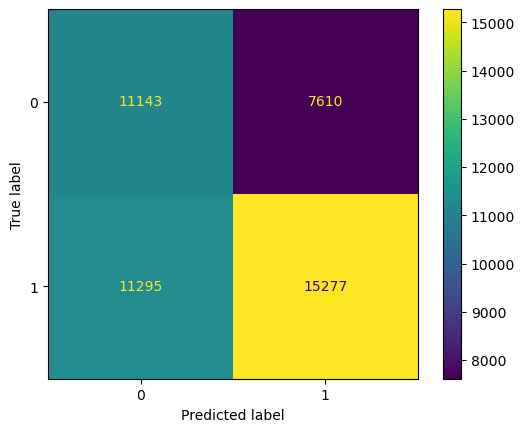

In [355]:
ConfusionMatrixDisplay(cm).plot()

In [356]:
#precision for grouped logit
precision_score(y_pred,y_train)

0.6674968322628566

In [357]:
#recall for grouped logit
recall_score(y_pred, y_train)

0.5749284961613729

In [358]:
#f1 score for grouped logit
f1_score(y_pred,y_train)

0.6177642087385511

### 2. Logit for vectorized

In [324]:
df_vect['popularity'] = np.where(df_vect['popularity'] >= np.median(df_vect['popularity']), 1, 0)

In [359]:
df_vect['popularity'].value_counts(normalize=True)

1    0.504931
0    0.495069
Name: popularity, dtype: float64

In [360]:
vect_train, vect_test = train_test_split(df_vect, test_size=0.25, random_state=42,
                                     stratify=df_vect[['track_genre','popularity']])

In [361]:
X_train = vect_train.drop(columns='popularity')
y_train = vect_train['popularity']
X_test = vect_test.drop(columns='popularity')
y_test = vect_test['popularity']

In [362]:
X_train.select_dtypes(exclude='number').columns

Index(['track_id', 'album_name', 'artists', 'track_name', 'track_genre',
       'href', 'preview_url'],
      dtype='object')

In [363]:
X_test.select_dtypes(exclude='number').columns

Index(['track_id', 'album_name', 'artists', 'track_name', 'track_genre',
       'href', 'preview_url'],
      dtype='object')

In [364]:
X_train.drop(columns=['track_id', 'album_name', 'artists', 'track_name', 'track_genre',
       'href', 'preview_url'],inplace=True)
X_test.drop(columns=['track_id', 'album_name', 'artists', 'track_name', 'track_genre',
       'href', 'preview_url'],inplace=True)

In [365]:
X_train.select_dtypes(exclude='number').columns

Index([], dtype='object')

In [366]:
X_test.select_dtypes(exclude='number').columns

Index([], dtype='object')

In [367]:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [368]:
logit_vect = LogisticRegression(max_iter=10000).fit(X_train_ss, y_train)

### 2. Evaluating logit vect

In [369]:
logit_vect.score(X_train_ss,y_train)

0.6203861003861004

In [370]:
y_pred = logit_vect.predict(X_train_ss)

In [371]:
cm = confusion_matrix(y_pred,y_train)

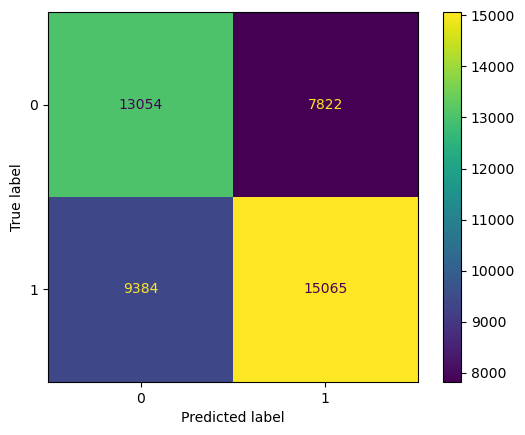

In [372]:
ConfusionMatrixDisplay(cm).plot()

In [373]:
#precision for vectorized logit
precision_score(y_pred,y_train)

0.6582339319264211

In [374]:
#recall for vectorized logit
recall_score(y_pred, y_train)

0.6161806208842897

In [375]:
#f1 score for vectorized logit
f1_score(y_pred,y_train)

0.6365134358627683

## Overall Evaluation

|               | Accuracy | Precision | Recall | F1 Score |
|---------------|----------|-----------|--------|----------|
| logit_grouped | 0.583    | 0.667     | 0.575  | 0.618    |
| logit_vect    | 0.620    | 0.658     | 0.616  | 0.637    |

Vectorizing the genres showed a higher accuracy, recall and F1 Score, but a slightly lower precision. Thus, it's more appropriate to vectorize genres instead of grouping them.